In [27]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from datetime import timedelta

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# configure visualizations
sns.set_style('whitegrid')
figsize=(8,6)

In [28]:
def load_df(path, columns=None, use_threads=True):
    try:
        return pq.read_table(path, columns=columns, use_threads=use_threads).to_pandas()
    except Exception as e:
        print(e)

def downcast_ints(df):
    # downcast int types
    df_int = df.select_dtypes(include=['int'])
    converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[converted_int.columns] = converted_int
    
    return df
        
def prepare(path,cols):

    df = load_df(path,cols)
    df = df.reset_index(drop=True)
    df = downcast_ints(df)
    
    return df

In [29]:
def pieOthers(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
        
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    colorsX = plt.cm.tab20.colors
    patches, texts = plt.pie(df2['value'], shadow=True, startangle=90, colors = colorsX)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
def pieOthers2(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
    
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    fig=plt.figure(figsize=(7,5))
    gs1 = gridspec.GridSpec(1,1,
        left=0.1,right=0.7,
        bottom=0.1,top=0.7,
    )
    pie_ax=fig.add_subplot(gs1[0])
    
    colors = plt.cm.tab20.colors
    wedges, texts = pie_ax.pie(
        df2['value'],
        shadow=True,
        colors=colors,
        startangle=90,
    )
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
        pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)
    pie_ax.axis('equal')

    plt.show()

In [30]:
cols = ['network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity', 'roaming_enabled', 'wifi_status', 'wifi_signal_strength', 'wifi_link_speed', 'wifi_ap_status', 'network_operator', 'sim_operator', 'mcc', 'mnc']
df = prepare('datasets/network_details.parquet',cols)

In [31]:
df.head(100)

,network_type,mobile_network_type,mobile_data_status,mobile_data_activity,roaming_enabled,wifi_status,wifi_signal_strength,wifi_link_speed,wifi_ap_status,network_operator,sim_operator,mcc,mnc
0,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-56,72,DISABLED,VERIZON,UNKNOWN,311,480
1,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-56,72,DISABLED,VERIZON,UNKNOWN,311,480
2,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-54,72,DISABLED,VERIZON,UNKNOWN,311,480
3,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-61,72,DISABLED,VERIZON,UNKNOWN,311,480
4,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-63,72,DISABLED,VERIZON,UNKNOWN,311,480
5,MOBILE,LTE,CONNECTED,NONE,0,ENABLED,-127,-1,DISABLED,VERIZON,UNKNOWN,311,480
6,MOBILE,LTE,CONNECTED,NONE,0,ENABLED,-127,-1,DISABLED,VERIZON,UNKNOWN,311,480
7,MOBILE,LTE,CONNECTED,NONE,0,ENABLED,-127,-1,DISABLED,VERIZON,UNKNOWN,311,480
8,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-88,1,DISABLED,VERIZON,UNKNOWN,311,480
9,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-87,1,DISABLED,VERIZON,UNKNOWN,311,480


In [32]:
dfNetworkTypeGB = df.groupby(['network_type'])['network_type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileNetworkTypeGB = df.groupby(['mobile_network_type'])['mobile_network_type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileDataStatusGB = df.groupby(['mobile_data_status'])['mobile_data_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileDataActivityGB = df.groupby(['mobile_data_activity'])['mobile_data_activity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfRoamingEnabledGB = df.groupby(['roaming_enabled'])['roaming_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfWifiStatusGB = df.groupby(['wifi_status'])['wifi_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfWifiApStatusGB = df.groupby(['wifi_ap_status'])['wifi_ap_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfNetworkOperatorGB = df.groupby(['network_operator'])['network_operator'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfSimOperatorGB = df.groupby(['sim_operator'])['sim_operator'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

dfRoamingEnabledGB['roaming_enabled'] = dfRoamingEnabledGB['roaming_enabled'].apply(lambda x: "No" if x == 0 else "Yes")


In [33]:
print("Network Details:"+str(len(df.index)))

Network Details:11957118


          network_type    count
4                 WIFI  6537412
3              UNKNOWN  2738388
2               MOBILE  2679702
0  BLUETOOTH TETHERING     1606
1             ETHERNET       10


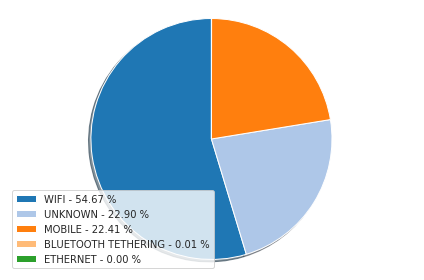

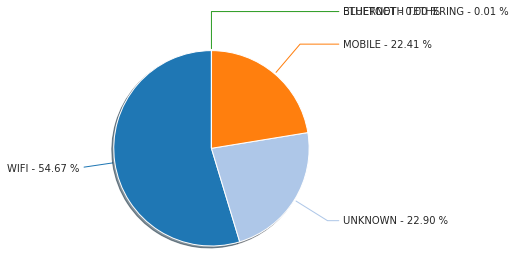

In [34]:
print(dfNetworkTypeGB)
pieOthers(dfNetworkTypeGB['network_type'],dfNetworkTypeGB['count'],0)
pieOthers2(dfNetworkTypeGB['network_type'],dfNetworkTypeGB['count'],0)

   mobile_network_type    count
18                 LTE  5237493
0                    0  2163607
19                UTMS  1547604
15                HSPA  1275566
16               HSPAP   667623
9                 EDGE   535027
17               HSUPA   175803
14               HSDPA   117057
3                   18    84144
13                GPRS    64550
12              EVDO_A    41998
10               EHRPD    25812
5                1XRTT    14554
4                   19     5030
7                   30      600
1                   16      473
6                   20      114
2                   17       49
8                 CDMA       13
11              EVDO_0        1


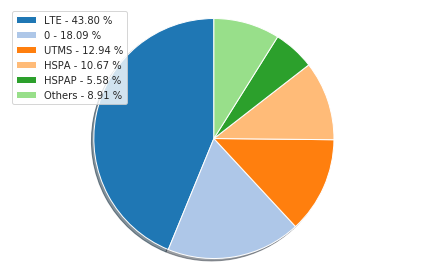

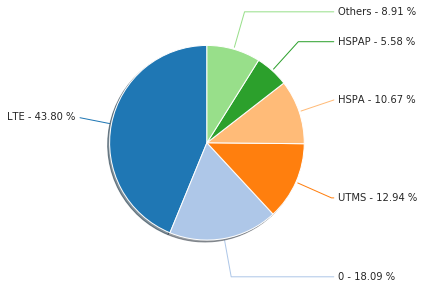

In [35]:
print(dfMobileNetworkTypeGB)
pieOthers(dfMobileNetworkTypeGB['mobile_network_type'],dfMobileNetworkTypeGB['count'],5)
pieOthers2(dfMobileNetworkTypeGB['mobile_network_type'],dfMobileNetworkTypeGB['count'],5)

  mobile_data_status    count
2       DISCONNECTED  9230822
0          CONNECTED  2696537
1         CONNECTING    19669
3          SUSPENDED    10090


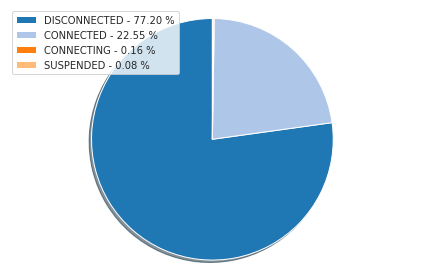

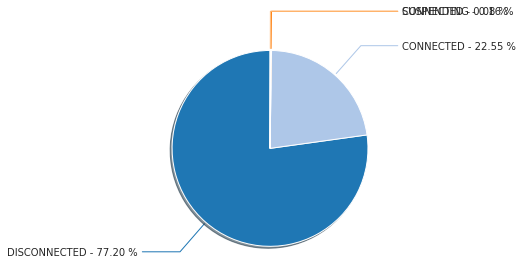

In [36]:
print(dfMobileDataStatusGB)
pieOthers(dfMobileDataStatusGB['mobile_data_status'],dfMobileDataStatusGB['count'],0)
pieOthers2(dfMobileDataStatusGB['mobile_data_status'],dfMobileDataStatusGB['count'],0)

  mobile_data_activity    count
2                 NONE  9533200
1                INOUT  1878260
3                  OUT   480168
0                   IN    65490


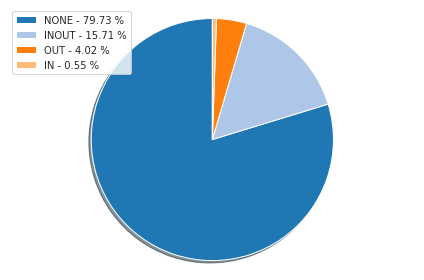

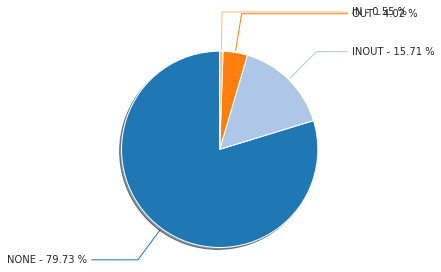

In [37]:
print(dfMobileDataActivityGB)
pieOthers(dfMobileDataActivityGB['mobile_data_activity'],dfMobileDataActivityGB['count'],0)
pieOthers2(dfMobileDataActivityGB['mobile_data_activity'],dfMobileDataActivityGB['count'],0)

  roaming_enabled     count
0              No  11715205
1             Yes    241913


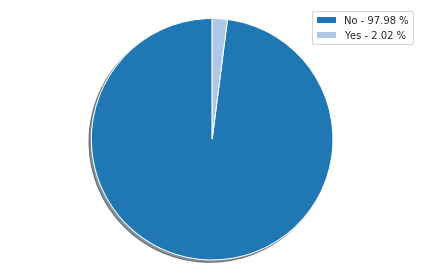

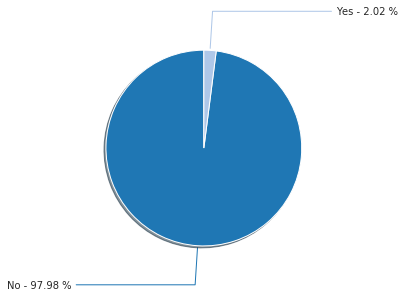

In [38]:
print(dfRoamingEnabledGB)
pieOthers(dfRoamingEnabledGB['roaming_enabled'],dfRoamingEnabledGB['count'],0)
pieOthers2(dfRoamingEnabledGB['roaming_enabled'],dfRoamingEnabledGB['count'],0)

  wifi_status    count
2     ENABLED  8260493
0    DISABLED  3691951
4     UNKNOWN     3060
3    ENABLING     1048
1   DISABLING      566


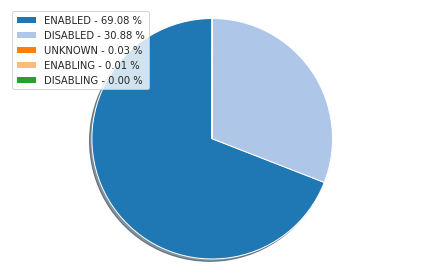

ValueError: cannot convert float NaN to integer

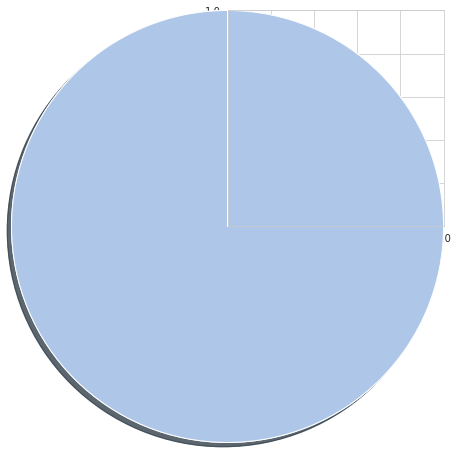

In [39]:
print(dfWifiStatusGB)
pieOthers(dfWifiStatusGB['wifi_status'],dfWifiStatusGB['count'],0)
pieOthers2(dfWifiStatusGB['wifi_status'],dfRoamingEnabledGB['count'],0)

  wifi_ap_status     count
0       DISABLED  11868024
2        ENABLED     84739
5        UNKNOWN      3404
4         FAILED       757
1      DISABLING       117
3       ENABLING        77


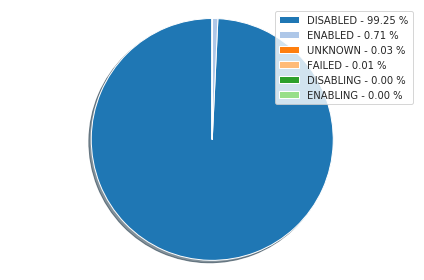

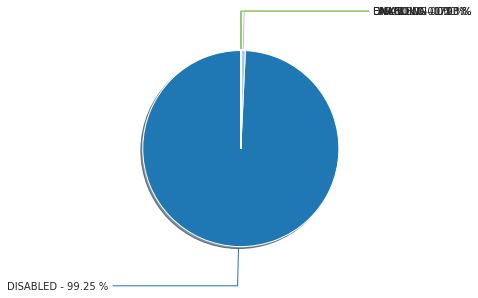

In [40]:
print(dfWifiApStatusGB)
pieOthers(dfWifiApStatusGB['wifi_ap_status'],dfWifiApStatusGB['count'],0)
pieOthers2(dfWifiApStatusGB['wifi_ap_status'],dfWifiApStatusGB['count'],0)

      network_operator    count
2748        VODAFONE P  1560562
2616           UNKNOWN  1190278
1470               NOS   922574
202         ALTICE MEO   619452
1078               MEO   468597
2140            TELCEL   223776
2235         TELKOMSEL   193295
1155          MOVISTAR   190474
2648              VIVO   174734
2871               WTF   173965
462              CLARO   163206
1101          METROPCS   151275
2630  VERIZON WIRELESS   137600
519            CRICKET   137028
40                   3   115335
1129             MOCHE   101632
2377               TIM    93872
2015            SPRINT    85317
1586            ORANGE    81573
466           CLARO BR    74544


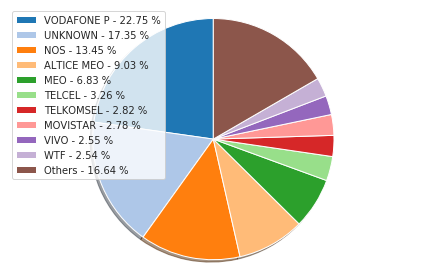

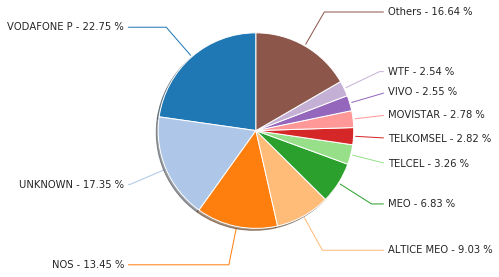

In [41]:
print(dfNetworkOperatorGB)
pieOthers(dfNetworkOperatorGB['network_operator'],dfNetworkOperatorGB['count'],10)
pieOthers2(dfNetworkOperatorGB['network_operator'],dfNetworkOperatorGB['count'],10)

    sim_operator    count
416      UNKNOWN  3592975
275          NOS  1072125
33    ALTICE MEO   686142
218          MEO   537638
392          TIM   362065
445   VODAFONE P   261591
430         VIVO   255706
358       TELCEL   255476
459          WTF   241721
81         CLARO   190407
241     MOVISTAR   183288
232        MOCHE   176697
384    TELKOMSEL   161072
421      VERIZON   135225
3              3   125318
398       TRUE-H   120002
83      CLARO BR   115912
22           AIS   110710
288       ORANGE    99939
14        AIRTEL    97678


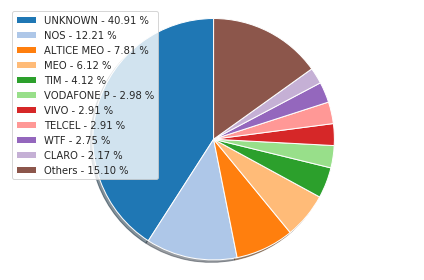

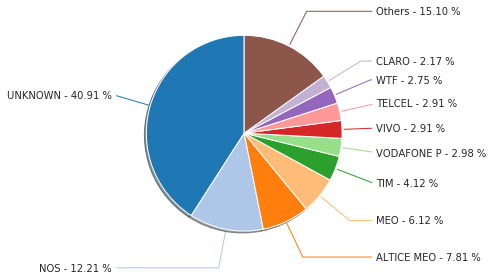

In [42]:
print(dfSimOperatorGB)
pieOthers(dfSimOperatorGB['sim_operator'],dfSimOperatorGB['count'],10)
pieOthers2(dfSimOperatorGB['sim_operator'],dfSimOperatorGB['count'],10)